In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score

#### Load NFT Sales Data

In [2]:
# load NFT sales data
nft_data = pd.read_excel('data/NFT Daily Tradings Summary.xlsx')
nft_data.rename(columns={'Sales (USD)': 'NFT Sales (USD)', 'Total Transactions': 'NFT Total Transactions'}, inplace=True)

In [3]:
nft_data

,Date,NFT Sales (USD),Unique Buyers,Unique Sellers,NFT Total Transactions,Average Sales (USD)
0,2017-06-23,1455.93,9,6,27,53.92
1,2017-06-24,845.73,7,8,15,56.38
2,2017-06-25,593.68,7,5,15,39.58
3,2017-06-26,1076.49,10,12,23,46.80
4,2017-06-27,2090.85,8,15,35,59.74
...,...,...,...,...,...,...
1952,2022-10-27,12997236.26,33706,32237,124117,104.72
1953,2022-10-28,13703513.62,33060,32791,118980,115.17
1954,2022-10-29,11042187.71,27641,27954,104309,105.86
1955,2022-10-30,11288798.91,30045,29469,96504,116.98


#### load Bitcoin Price data

In [4]:
# load Bitcoin Price data
bitcoin_price_data = pd.read_excel('data/bitcoin_prices.xlsx')
bitcoin_price_data.rename(columns={'Close': 'Bitcoin Price Today'}, inplace=True)

In [5]:
bitcoin_price_data

,Date,High,Low,Open,Bitcoin Price Today,Volume,Adj Close
0,2017-06-23,2765.169922,2706.370117,2707.340088,2744.909912,961318976,2744.909912
1,2017-06-24,2757.939941,2583.189941,2738.520020,2608.719971,982750016,2608.719971
2,2017-06-25,2682.260010,2552.120117,2607.250000,2589.409912,1161100032,2589.409912
3,2017-06-26,2615.250000,2376.290039,2590.570068,2478.449951,1663280000,2478.449951
4,2017-06-27,2552.449951,2332.989990,2478.449951,2552.449951,1489789952,2552.449951
...,...,...,...,...,...,...,...
1952,2022-10-27,20854.044922,20255.373047,20772.802734,20285.835938,49625110402,20285.835938
1953,2022-10-28,20724.980469,20086.068359,20287.957031,20595.351562,43994715910,20595.351562
1954,2022-10-29,20988.394531,20566.484375,20595.103516,20818.476562,40369840645,20818.476562
1955,2022-10-30,20917.005859,20547.462891,20817.982422,20635.603516,31486345556,20635.603516


#### Load Etherium Price data

In [6]:
ethereum_price_data = pd.read_excel('data/ethereum_prices.xlsx')
ethereum_price_data.rename(columns={'Close': 'Ethereum Price'}, inplace=True)

In [7]:
ethereum_price_data

,Date,Open,High,Low,Ethereum Price,Volume,Adj Close
0,2017-06-23,336.480000,348.010000,334.990000,341.740000,593206976,NaN
1,2017-06-24,341.630000,343.620000,322.090000,323.700000,673585024,NaN
2,2017-06-25,323.470000,332.790000,284.650000,303.250000,1186880000,NaN
3,2017-06-26,302.950000,311.460000,238.650000,272.690000,2081810048,NaN
4,2017-06-27,272.690000,293.090000,227.140000,293.090000,1973869952,NaN
...,...,...,...,...,...,...,...
1952,2022-10-27,1574.403442,1510.816772,1566.841431,1514.374878,22813499245,1514.374878
1953,2022-10-28,1568.633911,1493.871094,1514.323120,1555.477905,19974623205,1555.477905
1954,2022-10-29,1652.382202,1549.983643,1555.274658,1619.698486,21618154775,1619.698486
1955,2022-10-30,1637.037842,1579.485229,1619.697876,1590.783325,13930073427,1590.783325


#### load Gold Price data

In [8]:
# load Gold Price data
gold_price_data = pd.read_excel('data/Gold Prices.xlsx')
gold_price_data.rename(columns={'Close (USD)': 'Gold Price'}, inplace=True)

In [9]:
gold_price_data

,Date,Gold Price
0,2017-06-23,1275.8
1,2017-06-24,1275.8
2,2017-06-25,1275.8
3,2017-06-26,1281.6
4,2017-06-27,1269.2
...,...,...
1952,2022-10-27,1668.8
1953,2022-10-28,1648.3
1954,2022-10-29,1648.3
1955,2022-10-30,1648.3


#### New Dataframes

In [10]:
# Create new dataframe which contains close price of bitcoin and nft sales in usd and total nft transactions
new_df= pd.concat([nft_data[['NFT Sales (USD)', 'NFT Total Transactions']], gold_price_data[['Gold Price']], ethereum_price_data[['Ethereum Price']], bitcoin_price_data[['Bitcoin Price Today']]], axis=1)
new_df['Bitcoin Price'] = new_df[['Bitcoin Price Today']].shift(-1)
new_df

,NFT Sales (USD),NFT Total Transactions,Gold Price,Ethereum Price,Bitcoin Price Today,Bitcoin Price
0,1455.93,27,1275.8,341.740000,2744.909912,2608.719971
1,845.73,15,1275.8,323.700000,2608.719971,2589.409912
2,593.68,15,1275.8,303.250000,2589.409912,2478.449951
3,1076.49,23,1281.6,272.690000,2478.449951,2552.449951
4,2090.85,35,1269.2,293.090000,2552.449951,2574.790039
...,...,...,...,...,...,...
1952,12997236.26,124117,1668.8,1514.374878,20285.835938,20595.351562
1953,13703513.62,118980,1648.3,1555.477905,20595.351562,20818.476562
1954,11042187.71,104309,1648.3,1619.698486,20818.476562,20635.603516
1955,11288798.91,96504,1648.3,1590.783325,20635.603516,20495.773438


In [11]:
new_df.drop(new_df.tail(1).index,inplace=True) # drop last n rows
new_df

,NFT Sales (USD),NFT Total Transactions,Gold Price,Ethereum Price,Bitcoin Price Today,Bitcoin Price
0,1455.93,27,1275.8,341.740000,2744.909912,2608.719971
1,845.73,15,1275.8,323.700000,2608.719971,2589.409912
2,593.68,15,1275.8,303.250000,2589.409912,2478.449951
3,1076.49,23,1281.6,272.690000,2478.449951,2552.449951
4,2090.85,35,1269.2,293.090000,2552.449951,2574.790039
...,...,...,...,...,...,...
1951,12693890.22,100912,1669.2,1566.566650,20770.441406,20285.835938
1952,12997236.26,124117,1668.8,1514.374878,20285.835938,20595.351562
1953,13703513.62,118980,1648.3,1555.477905,20595.351562,20818.476562
1954,11042187.71,104309,1648.3,1619.698486,20818.476562,20635.603516


#### Correlation

In [12]:
# Correlataion between NFT Sales (USD) and close price of bitocin
new_df['NFT Sales (USD)'].corr(new_df['Bitcoin Price'])

0.6282953981807492

In [13]:
# Correlataion between NFT total transactions and close price of bitocin
new_df['NFT Total Transactions'].corr(new_df['Bitcoin Price'])

0.7528166511513132

In [14]:
# Correlataion Gold Price and close price of bitocin
new_df['Gold Price'].corr(new_df['Bitcoin Price'])

0.36599388687621903

In [15]:
# Correlataion Etherium Price and close price of bitocin
new_df['Ethereum Price'].corr(new_df['Bitcoin Price'])

0.9226987134542072

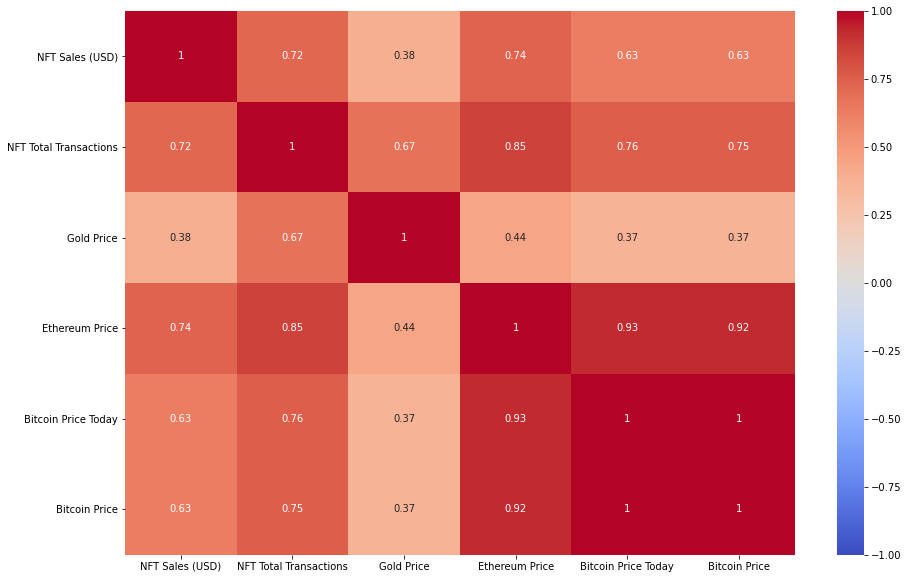

In [20]:
# Correlation Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(new_df.corr(), vmin=-1, cmap='coolwarm', annot=True) 
plt.savefig('heatmap.png')

#### Normalization

In [ ]:
new_df_copy = new_df.copy()

In [ ]:
columns = ['NFT Sales (USD)', 'NFT Total Transactions', 'Gold Price', 'Ethereum Price', 'Bitcoin Price', 'Bitcoin Price Today']
scalar = MinMaxScaler(feature_range=(0,1))
new_df[columns] = scalar.fit_transform(new_df[columns])

In [ ]:
new_df

#### Plots

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(new_df['Bitcoin Price Today'])
plt.plot(new_df['Bitcoin Price'])
plt.plot(new_df['Gold Price'])
plt.plot(new_df['NFT Sales (USD)'])
plt.plot(new_df['NFT Total Transactions'])
plt.plot(new_df['Ethereum Price'])
plt.xlabel("Days (23 June, 2017 - 31 October, 2022)")
plt.ylabel("Price (USD)")
plt.legend(["Bitcoin Price Today", "Bitcoin Price tomorrow", "Gold Price", "NFT Sales", 'NFT Total Transactions', 'Ethereum Price'], loc ="upper left")
plt.savefig(f'Data_comparison_chart.png')
plt.show()

In [ ]:
plt.scatter(new_df_copy['Gold Price'], new_df_copy['Bitcoin Price'])

plt.title('Bitcoin price and Gold Price')

plt.xlabel('Gold Price')

plt.ylabel('Bitcoin price')

plt.show()

In [ ]:
plt.scatter(new_df_copy['NFT Total Transactions'], new_df_copy['Bitcoin Price'])

plt.title('Bitcoin price and NFT Total Transactions')

plt.xlabel('NFT Total Transactions')

plt.ylabel('Bitcoin price')

plt.show()

In [ ]:
plt.scatter(new_df_copy['Gold Price'], new_df_copy['Bitcoin Price'])

plt.title('Bitcoin price and Gold')

plt.xlabel('Gold')

plt.ylabel('Bitcoin price')

plt.show()

In [ ]:
# plt.plot(new_df['Close'].tolist())
# plt.xlabel("Days (23 June, 2017 - 31 August, 2022)")
# plt.ylabel("Price (USD)")
# plt.legend(["Bitcoin Price"], loc ="upper left")
# plt.show()

In [ ]:
# plt.plot(scaled_sales, c = '#FF8C00')
# plt.xlabel("Days (23 June, 2017 - 31 August, 2022)")
# plt.ylabel("Price (USD)")
# plt.legend(["NFT Sales"], loc ="upper left")
# plt.show()

#### Prediction

In [ ]:
# Independent data sets (x)
X1 = np.array(new_df[['NFT Sales (USD)']])
X2 = np.array(new_df[['NFT Total Transactions']])
X3  = np.array(new_df[['NFT Sales (USD)', 'NFT Total Transactions']])
X4 = np.array(new_df[['Gold Price']])
X5  = np.array(new_df[['Gold Price', 'NFT Sales (USD)', 'NFT Total Transactions']])
X6 = np.array(new_df[['Ethereum Price']])
X7 = np.array(new_df[['NFT Sales (USD)', 'NFT Total Transactions', 'Ethereum Price']])
X8  = np.array(new_df[['Gold Price', 'NFT Sales (USD)', 'NFT Total Transactions', 'Ethereum Price']])

In [ ]:
# Dependent data set (y)
y = new_df['Bitcoin Price'].values
y

In [ ]:
# Split the data (70-30)
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, y, test_size=.30, random_state=12)
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, y, test_size=.30, random_state=12)
x3_train, x3_test, y3_train, y3_test = train_test_split(X3, y, test_size=.30, random_state=12)
x4_train, x4_test, y4_train, y4_test = train_test_split(X4, y, test_size=.30, random_state=12)
x5_train, x5_test, y5_train, y5_test = train_test_split(X5, y, test_size=.30, random_state=12)
x6_train, x6_test, y6_train, y6_test = train_test_split(X6, y, test_size=.30, random_state=12)
x7_train, x7_test, y7_train, y7_test = train_test_split(X7, y, test_size=.30, random_state=12)
x8_train, x8_test, y8_train, y8_test = train_test_split(X8, y, test_size=.30, random_state=12)

In [ ]:
def create_and_train_linear_regression_model(x_train, y_train):
    # Create model
    lr = LinearRegression()
    #train
    lr.fit(x_train, y_train)
    return lr

In [ ]:
def create_and_train_random_forest_model(x_train, y_train):
    # Create model
    rf=RandomForestRegressor(n_estimators= 100, min_samples_split=2)
    #train
    rf.fit(x_train, y_train)
    return rf

In [ ]:
def create_and_train_xgBoost_model(x_train, y_train):
    # Create model
    
    xgb_r = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 10) 
    
    #train
    xgb_r.fit(x_train,y_train)
    return xgb_r

In [ ]:
# Linear regression models
lr1 = create_and_train_linear_regression_model(x1_train, y1_train)
lr2 = create_and_train_linear_regression_model(x2_train, y2_train)
lr3 = create_and_train_linear_regression_model(x3_train, y3_train)
lr4 = create_and_train_linear_regression_model(x4_train, y4_train)
lr5 = create_and_train_linear_regression_model(x5_train, y5_train)
lr6 = create_and_train_linear_regression_model(x6_train, y6_train)
lr7 = create_and_train_linear_regression_model(x7_train, y7_train)
lr8 = create_and_train_linear_regression_model(x8_train, y8_train)

In [ ]:
# random forest models
rf1 = create_and_train_random_forest_model(x1_train, y1_train)
rf2 = create_and_train_random_forest_model(x2_train, y2_train)
rf3 = create_and_train_random_forest_model(x3_train, y3_train)
rf4 = create_and_train_random_forest_model(x4_train, y4_train)
rf5 = create_and_train_random_forest_model(x5_train, y5_train)
rf6 = create_and_train_random_forest_model(x6_train, y6_train)
rf7 = create_and_train_random_forest_model(x7_train, y7_train)
rf8 = create_and_train_random_forest_model(x8_train, y8_train)

In [ ]:
# XGBoost models
xgb1 = create_and_train_xgBoost_model(x1_train, y1_train)
xgb2 = create_and_train_xgBoost_model(x2_train, y2_train)
xgb3 = create_and_train_xgBoost_model(x3_train, y3_train)
xgb4 = create_and_train_xgBoost_model(x4_train, y4_train)
xgb5 = create_and_train_xgBoost_model(x5_train, y5_train)
xgb6 = create_and_train_xgBoost_model(x6_train, y6_train)
xgb7 = create_and_train_xgBoost_model(x7_train, y7_train)
xgb8 = create_and_train_xgBoost_model(x8_train, y8_train)

#### coefficient of determination (R2) For Linear Regression

In [ ]:
# Test using score
print('Coefficient of determination NFT sales and bitcoin price', lr1.score(x1_test, y1_test))
print('Coefficient of determination NFT transactions and bitcoin price', lr2.score(x2_test, y2_test))
print('Coefficient of determination NFT sales, transactions and bitcoin price', lr3.score(x3_test, y3_test))
print('Coefficient of determination Gold Price and bitcoin price', lr4.score(x4_test, y4_test))
print('Coefficient of determination Gold Price, NFT sales, transactions and bitcoin price', lr5.score(x5_test, y5_test))
print('Coefficient of determination Ethereum Price and bitcoin price', lr6.score(x6_test, y6_test))
print('Coefficient of determination Ethereum Price, NFT sales, transactions and bitcoin price', lr7.score(x7_test, y7_test))
print('Coefficient of determination Ethereum Price, Gold Price, NFT sales, transactions and bitcoin price', lr8.score(x8_test, y8_test))

#### coefficient of determination (R2) For Random Forest

In [ ]:
print('Coefficient of determination NFT sales and bitcoin price', rf1.score(x1_test, y1_test))
print('Coefficient of determination NFT transactions and bitcoin price', rf2.score(x2_test, y2_test))
print('Coefficient of determination NFT sales, transactions and bitcoin price', rf3.score(x3_test, y3_test))
print('Coefficient of determination Gold Price and bitcoin price', rf4.score(x4_test, y4_test))
print('Coefficient of determination Gold Price, NFT sales, transactions and bitcoin price', rf5.score(x5_test, y5_test))
print('Coefficient of determination Ethereum Price and bitcoin price', rf6.score(x6_test, y6_test))
print('Coefficient of determination Ethereum Price, NFT sales, transactions and bitcoin price', rf7.score(x7_test, y7_test))
print('Coefficient of determination Ethereum Price, Gold Price, NFT sales, transactions and bitcoin price', rf8.score(x8_test, y8_test))

#### coefficient of determination (R2) For XGBoost

In [ ]:
print('Coefficient of determination NFT sales and bitcoin price', xgb1.score(x1_test, y1_test))
print('Coefficient of determination NFT transactions and bitcoin price', xgb2.score(x2_test, y2_test))
print('Coefficient of determination NFT sales, transactions and bitcoin price', xgb3.score(x3_test, y3_test))
print('Coefficient of determination Gold Price and bitcoin price', xgb4.score(x4_test, y4_test))
print('Coefficient of determination Gold Price, NFT sales, transactions and bitcoin price', xgb5.score(x5_test, y5_test))
print('Coefficient of determination Ethereum Price and bitcoin price', xgb6.score(x6_test, y6_test))
print('Coefficient of determination Ethereum Price, NFT sales, transactions and bitcoin price', xgb7.score(x7_test, y7_test))
print('Coefficient of determination Ethereum Price, Gold Price, NFT sales, transactions and bitcoin price', xgb8.score(x8_test, y8_test))

In [ ]:
# print('Coef ', lr.coef_)
# print('Intercept', lr.intercept_)
# Y= a + bX, b is the slope, a i the intercept

In [ ]:
# Prediction for linear regression
lr1_prediction = lr1.predict(x1_test)
lr2_prediction = lr2.predict(x2_test)
lr3_prediction = lr3.predict(x3_test)
lr4_prediction = lr4.predict(x4_test)
lr5_prediction = lr5.predict(x5_test)
lr6_prediction = lr6.predict(x6_test)
lr7_prediction = lr7.predict(x7_test)
lr8_prediction = lr8.predict(x8_test)

In [ ]:
# Prediction for Random forest
rf1_prediction = rf1.predict(x1_test)
rf2_prediction = rf2.predict(x2_test)
rf3_prediction = rf3.predict(x3_test)
rf4_prediction = rf4.predict(x4_test)
rf5_prediction = rf5.predict(x5_test)
rf6_prediction = rf6.predict(x6_test)
rf7_prediction = rf7.predict(x7_test)
rf8_prediction = rf8.predict(x8_test)

In [ ]:
# Prediction for Random forest
xgb1_prediction = xgb1.predict(x1_test)
xgb2_prediction = xgb2.predict(x2_test)
xgb3_prediction = xgb3.predict(x3_test)
xgb4_prediction = xgb4.predict(x4_test)
xgb5_prediction = xgb5.predict(x5_test)
xgb6_prediction = xgb6.predict(x6_test)
xgb7_prediction = xgb7.predict(x7_test)
xgb8_prediction = xgb8.predict(x8_test)

### Errors

#### NFT Sales

In [ ]:
print('------------Linear Regression------------------------')

MAE_nft_sales_lr = mean_absolute_error(y1_test, lr1.predict(x1_test))
MSE_nft_sales_lr = mean_squared_error(y1_test, lr1.predict(x1_test))
RMSE_nft_sales_lr = np.sqrt(mean_squared_error(y1_test, lr1.predict(x1_test)))

print('Mean Absolute Error for Test Set:', MAE_nft_sales_lr)
print('Mean Squared Error for Test Set:', MSE_nft_sales_lr)
print('Root Mean Squared Error for Test Set:', RMSE_nft_sales_lr)

print('------------Random Forest------------------------')

MAE_nft_sales_rf = mean_absolute_error(y1_test, rf1.predict(x1_test))
MSE_nft_sales_rf = mean_squared_error(y1_test, rf1.predict(x1_test))
RMSE_nft_sales_rf = np.sqrt(mean_squared_error(y1_test, rf1.predict(x1_test)))

print('Mean Absolute Error for Test Set:', MAE_nft_sales_rf)
print('Mean Squared Error for Test Set:', MSE_nft_sales_rf)
print('Root Mean Squared Error for Test Set:', RMSE_nft_sales_rf)

print('------------XGBoost------------------------')

MAE_nft_sales_xgb = mean_absolute_error(y1_test, xgb1.predict(x1_test))
MSE_nft_sales_xgb = mean_squared_error(y1_test, xgb1.predict(x1_test))
RMSE_nft_sales_xgb = np.sqrt(mean_squared_error(y1_test, xgb1.predict(x1_test)))

print('Mean Absolute Error for Test Set:', MAE_nft_sales_xgb)
print('Mean Squared Error for Test Set:', MSE_nft_sales_xgb)
print('Root Mean Squared Error for Test Set:', RMSE_nft_sales_xgb)

#### NFT Transactions

In [ ]:
print('------------Linear Regression------------------------')

MAE_nft_transactions_lr = mean_absolute_error(y2_test, lr2.predict(x2_test))
MSE_nft_transactions_lr = mean_squared_error(y2_test, lr2.predict(x2_test))
RMSE_nft_transactions_lr = np.sqrt(mean_squared_error(y2_test, lr2.predict(x2_test)))

print('Mean Absolute Error for Test Set:', MAE_nft_transactions_lr)
print('Mean Squared Error for Test Set:', MSE_nft_transactions_lr)
print('Root Mean Squared Error for Test Set:', RMSE_nft_transactions_lr)

print('------------Random Forest------------------------')

MAE_nft_transactions_rf = mean_absolute_error(y2_test, rf2.predict(x2_test))
MSE_nft_transactions_rf = mean_squared_error(y2_test, rf2.predict(x2_test))
RMSE_nft_transactions_rf = np.sqrt(mean_squared_error(y2_test, rf2.predict(x2_test)))

print('Mean Absolute Error for Test Set:', MAE_nft_transactions_rf)
print('Mean Squared Error for Test Set:', MSE_nft_transactions_rf)
print('Root Mean Squared Error for Test Set:', RMSE_nft_transactions_rf)

print('-------------XGBoost------------------------')

MAE_nft_transactions_xgb = mean_absolute_error(y2_test, xgb2.predict(x2_test))
MSE_nft_transactions_xgb = mean_squared_error(y2_test, xgb2.predict(x2_test))
RMSE_nft_transactions_xgb = np.sqrt(mean_squared_error(y2_test, xgb2.predict(x2_test)))

print('Mean Absolute Error for Test Set:', MAE_nft_transactions_xgb)
print('Mean Squared Error for Test Set:', MSE_nft_transactions_xgb)
print('Root Mean Squared Error for Test Set:', RMSE_nft_transactions_xgb)

#### NFT Sales and NFT Transactions

In [ ]:
print('------------Linear Regression------------------------')

MAE_nft_sales_transactions_lr = mean_absolute_error(y3_test, lr3.predict(x3_test))
MSE_nft_sales_transactions_lr = mean_squared_error(y3_test, lr3.predict(x3_test))
RMSE_nft_sales_transactions_lr = np.sqrt(mean_squared_error(y3_test, lr3.predict(x3_test)))

print('Mean Absolute Error for Test Set:', MAE_nft_sales_transactions_lr)
print('Mean Squared Error for Test Set:', MSE_nft_sales_transactions_lr)
print('Root Mean Squared Error for Test Set:', RMSE_nft_sales_transactions_lr)

print('------------Random Forest------------------------')

MAE_nft_sales_transactions_rf = mean_absolute_error(y3_test, rf3.predict(x3_test))
MSE_nft_sales_transactions_rf = mean_squared_error(y3_test, rf3.predict(x3_test))
RMSE_nft_sales_transactions_rf = np.sqrt(mean_squared_error(y3_test, rf3.predict(x3_test)))

print('Mean Absolute Error for Test Set:', MAE_nft_sales_transactions_rf)
print('Mean Squared Error for Test Set:', MSE_nft_sales_transactions_rf)
print('Root Mean Squared Error for Test Set:', RMSE_nft_sales_transactions_rf)

print('-------------XGBoost------------------------')

MAE_nft_sales_transactions_xgb = mean_absolute_error(y3_test, xgb3.predict(x3_test))
MSE_nft_sales_transactions_xgb = mean_squared_error(y3_test, xgb3.predict(x3_test))
RMSE_nft_sales_transactions_xgb = np.sqrt(mean_squared_error(y3_test, xgb3.predict(x3_test)))

print('Mean Absolute Error for Test Set:', MAE_nft_sales_transactions_xgb)
print('Mean Squared Error for Test Set:', MSE_nft_sales_transactions_xgb)
print('Root Mean Squared Error for Test Set:', RMSE_nft_sales_transactions_xgb)


#### Gold Price

In [ ]:
print('------------Linear Regression------------------------')

MAE_gold_price_lr = mean_absolute_error(y4_test, lr4.predict(x4_test))
MSE_gold_price_lr = mean_squared_error(y4_test, lr4.predict(x4_test))
RMSE_gold_price_lr = np.sqrt(mean_squared_error(y4_test, lr4.predict(x4_test)))

print('Mean Absolute Error for Test Set:', MAE_gold_price_lr)
print('Mean Squared Error for Test Set:', MSE_gold_price_lr)
print('Root Mean Squared Error for Test Set:', RMSE_gold_price_lr)

print('------------Random Forest------------------------')

MAE_gold_price_rf = mean_absolute_error(y4_test, rf4.predict(x4_test))
MSE_gold_price_rf = mean_squared_error(y4_test, rf4.predict(x4_test))
RMSE_gold_price_rf = np.sqrt(mean_squared_error(y4_test, rf4.predict(x4_test)))

print('Mean Absolute Error for Test Set:', MAE_gold_price_rf)
print('Mean Squared Error for Test Set:', MSE_gold_price_rf)
print('Root Mean Squared Error for Test Set:', RMSE_gold_price_rf)

print('-------------XGBoost------------------------')

MAE_gold_price_xgb = mean_absolute_error(y4_test, xgb4.predict(x4_test))
MSE_gold_price_xgb = mean_squared_error(y4_test, xgb4.predict(x4_test))
RMSE_gold_price_xgb = np.sqrt(mean_squared_error(y4_test, xgb4.predict(x4_test)))

print('Mean Absolute Error for Test Set:', MAE_gold_price_xgb)
print('Mean Squared Error for Test Set:', MSE_gold_price_xgb)
print('Root Mean Squared Error for Test Set:', RMSE_gold_price_xgb)

#### Gold Price, NFT Sales and NFT Transactions

In [ ]:
print('------------Linear Regression------------------------')

MAE_gold_nft_sales_transactions_lr = mean_absolute_error(y5_test, lr5.predict(x5_test))
MSE_gold_nft_sales_transactions_lr = mean_squared_error(y5_test, lr5.predict(x5_test))
RMSE_gold_nft_sales_transactions_lr = np.sqrt(mean_squared_error(y5_test, lr5.predict(x5_test)))

print('Mean Absolute Error for Test Set:', MAE_gold_nft_sales_transactions_lr)
print('Mean Squared Error for Test Set:', MSE_gold_nft_sales_transactions_lr)
print('Root Mean Squared Error for Test Set:', RMSE_gold_nft_sales_transactions_lr)

print('------------Random Forest------------------------')

MAE_gold_nft_sales_transactions_rf = mean_absolute_error(y5_test, rf5.predict(x5_test))
MSE_gold_nft_sales_transactions_rf = mean_squared_error(y5_test, rf5.predict(x5_test))
RMSE_gold_nft_sales_transactions_rf = np.sqrt(mean_squared_error(y5_test, rf5.predict(x5_test)))

print('Mean Absolute Error for Test Set:', MAE_gold_nft_sales_transactions_rf)
print('Mean Squared Error for Test Set:', MSE_gold_nft_sales_transactions_rf)
print('Root Mean Squared Error for Test Set:', RMSE_gold_nft_sales_transactions_rf)

print('-------------XGBoost------------------------')

MAE_gold_nft_sales_transactions_xgb = mean_absolute_error(y5_test, xgb5.predict(x5_test))
MSE_gold_nft_sales_transactions_xgb = mean_squared_error(y5_test, xgb5.predict(x5_test))
RMSE_gold_nft_sales_transactions_xgb = np.sqrt(mean_squared_error(y5_test, xgb5.predict(x5_test)))

print('Mean Absolute Error for Test Set:', MAE_gold_nft_sales_transactions_xgb)
print('Mean Squared Error for Test Set:', MSE_gold_nft_sales_transactions_xgb)
print('Root Mean Squared Error for Test Set:', RMSE_gold_nft_sales_transactions_xgb)

#### Ethereum Price

In [ ]:
print('------------Linear Regression------------------------')

MAE_ethereum_lr = mean_absolute_error(y6_test, lr6.predict(x6_test))
MSE_ethereum_lr = mean_squared_error(y6_test, lr6.predict(x6_test))
RMSE_ethereum_lr = np.sqrt(mean_squared_error(y6_test, lr6.predict(x6_test)))

print('Mean Absolute Error for Test Set:', MAE_ethereum_lr)
print('Mean Squared Error for Test Set:', MSE_ethereum_lr)
print('Root Mean Squared Error for Test Set:', RMSE_ethereum_lr)

print('------------Random Forest------------------------')

MAE_ethereum_rf = mean_absolute_error(y6_test, rf6.predict(x6_test))
MSE_ethereum_rf = mean_squared_error(y6_test, rf6.predict(x6_test))
RMSE_ethereum_rf = np.sqrt(mean_squared_error(y6_test, rf6.predict(x6_test)))

print('Mean Absolute Error for Test Set:', MAE_ethereum_rf)
print('Mean Squared Error for Test Set:', MSE_ethereum_rf)
print('Root Mean Squared Error for Test Set:', RMSE_ethereum_rf)

print('-------------XGBoost------------------------')

MAE_ethereum_xgb = mean_absolute_error(y6_test, xgb6.predict(x6_test))
MSE_ethereum_xgb = mean_squared_error(y6_test, xgb6.predict(x6_test))
RMSE_ethereum_xgb = np.sqrt(mean_squared_error(y6_test, xgb6.predict(x6_test)))

print('Mean Absolute Error for Test Set:', MAE_ethereum_xgb)
print('Mean Squared Error for Test Set:', MSE_ethereum_xgb)
print('Root Mean Squared Error for Test Set:', RMSE_ethereum_xgb)

#### Ethereum Price, NFT sales and transactions

In [ ]:
print('------------Linear Regression------------------------')

MAE_ethereum_nft_sales_transactions_lr = mean_absolute_error(y7_test, lr7.predict(x7_test))
MSE_ethereum_nft_sales_transactions_lr = mean_squared_error(y7_test, lr7.predict(x7_test))
RMSE_ethereum_nft_sales_transactions_lr = np.sqrt(mean_squared_error(y7_test, lr7.predict(x7_test)))

print('Mean Absolute Error for Test Set:', MAE_ethereum_nft_sales_transactions_lr)
print('Mean Squared Error for Test Set:', MSE_ethereum_nft_sales_transactions_lr)
print('Root Mean Squared Error for Test Set:', RMSE_ethereum_nft_sales_transactions_lr)

print('------------Random Forest------------------------')

MAE_ethereum_nft_sales_transactions_rf = mean_absolute_error(y7_test, rf7.predict(x7_test))
MSE_ethereum_nft_sales_transactions_rf = mean_squared_error(y7_test, rf7.predict(x7_test))
RMSE_ethereum_nft_sales_transactions_rf = np.sqrt(mean_squared_error(y7_test, rf7.predict(x7_test)))

print('Mean Absolute Error for Test Set:', MAE_ethereum_nft_sales_transactions_rf)
print('Mean Squared Error for Test Set:', MSE_ethereum_nft_sales_transactions_rf)
print('Root Mean Squared Error for Test Set:', RMSE_ethereum_nft_sales_transactions_rf)

print('-------------XGBoost------------------------')

MAE_ethereum_nft_sales_transactions_xgb = mean_absolute_error(y7_test, xgb7.predict(x7_test))
MSE_ethereum_nft_sales_transactions_xgb = mean_squared_error(y7_test, xgb7.predict(x7_test))
RMSE_ethereum_nft_sales_transactions_xgb = np.sqrt(mean_squared_error(y7_test, xgb7.predict(x7_test)))

print('Mean Absolute Error for Test Set:', MAE_ethereum_nft_sales_transactions_xgb)
print('Mean Squared Error for Test Set:', MSE_ethereum_nft_sales_transactions_xgb)
print('Root Mean Squared Error for Test Set:', RMSE_ethereum_nft_sales_transactions_xgb)

#### Ethereum Price, Gold Price, NFT sales and transactions

In [ ]:
print('------------Linear Regression------------------------')

MAE_gold_ethereum_nft_sales_transactions_lr = mean_absolute_error(y8_test, lr8.predict(x8_test))
MSE_gold_ethereum_nft_sales_transactions_lr = mean_squared_error(y8_test, lr8.predict(x8_test))
RMSE_gold_ethereum_nft_sales_transactions_lr = np.sqrt(mean_squared_error(y8_test, lr8.predict(x8_test)))

print('Mean Absolute Error for Test Set:', MAE_gold_ethereum_nft_sales_transactions_lr)
print('Mean Squared Error for Test Set:', MSE_gold_ethereum_nft_sales_transactions_lr)
print('Root Mean Squared Error for Test Set:', RMSE_gold_ethereum_nft_sales_transactions_lr)

print('------------Random Forest------------------------')

MAE_gold_ethereum_nft_sales_transactions_rf = mean_absolute_error(y8_test, rf8.predict(x8_test))
MSE_gold_ethereum_nft_sales_transactions_rf = mean_squared_error(y8_test, rf8.predict(x8_test))
RMSE_gold_ethereum_nft_sales_transactions_rf = np.sqrt(mean_squared_error(y8_test, rf8.predict(x8_test)))

print('Mean Absolute Error for Test Set:', MAE_gold_ethereum_nft_sales_transactions_rf)
print('Mean Squared Error for Test Set:', MSE_gold_ethereum_nft_sales_transactions_rf)
print('Root Mean Squared Error for Test Set:', RMSE_gold_ethereum_nft_sales_transactions_rf)

print('------------XGBoost------------------------')

MAE_gold_ethereum_nft_sales_transactions_xgb = mean_absolute_error(y8_test, xgb8.predict(x8_test))
MSE_gold_ethereum_nft_sales_transactions_xgb = mean_squared_error(y8_test, xgb8.predict(x8_test))
RMSE_gold_ethereum_nft_sales_transactions_xgb = np.sqrt(mean_squared_error(y8_test, xgb8.predict(x8_test)))

print('Mean Absolute Error for Test Set:', MAE_gold_ethereum_nft_sales_transactions_xgb)
print('Mean Squared Error for Test Set:', MSE_gold_ethereum_nft_sales_transactions_xgb)
print('Root Mean Squared Error for Test Set:', RMSE_gold_ethereum_nft_sales_transactions_xgb)

## Error Comparison Table for Linear Regression

In [ ]:
print(f'Dataset                                               | MAE  | MSE  | RMSE  ')
print(f'________________________________________________________________________________')
round_off = 5

print(f'NFT Sales                                             | \
{ round(MAE_nft_sales_lr, round_off) } | {round(MSE_nft_sales_lr, round_off) } | {round(RMSE_nft_sales_lr, round_off) }')
print(f'NFT Transactions                                      | \
{ round(MAE_nft_transactions_lr, round_off) } | {round(MSE_nft_transactions_lr, round_off) } | {round(RMSE_nft_transactions_lr, round_off) }')
print(f'NFT Sales and Transactions                            | \
{ round(MAE_nft_sales_transactions_lr, round_off) } | {round(MSE_nft_sales_transactions_lr, round_off) } | {round(RMSE_nft_sales_transactions_lr, round_off) }')
print(f'Gold Price                                            | \
{ round(MAE_gold_price_lr, round_off) } | {round(MSE_gold_price_lr, round_off) } | {round(RMSE_gold_price_lr, round_off) }')
print(f'Gold Price, NFT Sales and Transactions                | \
{ round(MAE_gold_nft_sales_transactions_lr, round_off) } | {round(MSE_gold_nft_sales_transactions_lr, round_off) } | {round(RMSE_gold_nft_sales_transactions_lr, round_off) }')
print(f'Ethereum Price                                        | \
{ round(MAE_ethereum_lr, round_off) } | {round(MSE_ethereum_lr, round_off) } | {round(RMSE_ethereum_lr, round_off) }')
print(f'Ethereum Price, NFT Sales and Transactions            | \
{ round(MAE_ethereum_nft_sales_transactions_lr, round_off) } | {round(MSE_ethereum_nft_sales_transactions_lr, round_off) } | {round(RMSE_ethereum_nft_sales_transactions_lr, round_off) }')
print(f'Ethereum Price, Gold Price, NFT Sales and Transactions| \
{ round(MAE_gold_ethereum_nft_sales_transactions_lr, round_off) } | {round(MSE_gold_ethereum_nft_sales_transactions_lr, round_off) } | {round(RMSE_gold_ethereum_nft_sales_transactions_lr, round_off) }')


## Error Comparison Table for Random Forest

In [ ]:
print(f'Dataset                                               | MAE  | MSE  | RMSE  ')
print(f'________________________________________________________________________________')
round_off = 5

print(f'NFT Sales                                             | \
{ round(MAE_nft_sales_rf, round_off) } | {round(MSE_nft_sales_rf, round_off) } | {round(RMSE_nft_sales_rf, round_off) }')
print(f'NFT Transactions                                      | \
{ round(MAE_nft_transactions_rf, round_off) } | {round(MSE_nft_transactions_rf, round_off) } | {round(RMSE_nft_transactions_rf, round_off) }')
print(f'NFT Sales and Transactions                            | \
{ round(MAE_nft_sales_transactions_rf, round_off) } | {round(MSE_nft_sales_transactions_rf, round_off) } | {round(RMSE_nft_sales_transactions_rf, round_off) }')
print(f'Gold Price                                            | \
{ round(MAE_gold_price_rf, round_off) } | {round(MSE_gold_price_rf, round_off) } | {round(RMSE_gold_price_rf, round_off) }')
print(f'Gold Price, NFT Sales and Transactions                | \
{ round(MAE_gold_nft_sales_transactions_rf, round_off) } | {round(MSE_gold_nft_sales_transactions_rf, round_off) } | {round(RMSE_gold_nft_sales_transactions_rf, round_off) }')
print(f'Ethereum Price                                        | \
{ round(MAE_ethereum_rf, round_off) } | {round(MSE_ethereum_rf, round_off) } | {round(RMSE_ethereum_rf, round_off) }')
print(f'Ethereum Price, NFT Sales and Transactions            | \
{ round(MAE_ethereum_nft_sales_transactions_rf, round_off) } | {round(MSE_ethereum_nft_sales_transactions_rf, round_off) } | {round(RMSE_ethereum_nft_sales_transactions_rf, round_off) }')
print(f'Ethereum Price, Gold Price, NFT Sales and Transactions| \
{ round(MAE_gold_ethereum_nft_sales_transactions_rf, round_off) } | {round(MSE_gold_ethereum_nft_sales_transactions_rf, round_off) } | {round(RMSE_gold_ethereum_nft_sales_transactions_rf, round_off) }')


## Error Comparison Table for XGBoost

In [ ]:
print(f'Dataset                                               | MAE  | MSE  | RMSE  ')
print(f'________________________________________________________________________________')
round_off = 5

print(f'NFT Sales                                             | \
{ round(MAE_nft_sales_xgb, round_off) } | {round(MSE_nft_sales_xgb, round_off) } | {round(RMSE_nft_sales_xgb, round_off) }')
print(f'NFT Transactions                                      | \
{ round(MAE_nft_transactions_xgb, round_off) } | {round(MSE_nft_transactions_xgb, round_off) } | {round(RMSE_nft_transactions_xgb, round_off) }')
print(f'NFT Sales and Transactions                            | \
{ round(MAE_nft_sales_transactions_xgb, round_off) } | {round(MSE_nft_sales_transactions_xgb, round_off) } | {round(RMSE_nft_sales_transactions_xgb, round_off) }')
print(f'Gold Price                                            | \
{ round(MAE_gold_price_xgb, round_off) } | {round(MSE_gold_price_xgb, round_off) } | {round(RMSE_gold_price_xgb, round_off) }')
print(f'Gold Price, NFT Sales and Transactions                | \
{ round(MAE_gold_nft_sales_transactions_xgb, round_off) } | {round(MSE_gold_nft_sales_transactions_xgb, round_off) } | {round(RMSE_gold_nft_sales_transactions_xgb, round_off) }')
print(f'Ethereum Price                                        | \
{ round(MAE_ethereum_xgb, round_off) } | {round(MSE_ethereum_xgb, round_off) } | {round(RMSE_ethereum_xgb, round_off) }')
print(f'Ethereum Price, NFT Sales and Transactions            | \
{ round(MAE_ethereum_nft_sales_transactions_xgb, round_off) } | {round(MSE_ethereum_nft_sales_transactions_xgb, round_off) } | {round(RMSE_ethereum_nft_sales_transactions_xgb, round_off) }')
print(f'Ethereum Price, Gold Price, NFT Sales and Transactions| \
{ round(MAE_gold_ethereum_nft_sales_transactions_xgb, round_off) } | {round(MSE_gold_ethereum_nft_sales_transactions_xgb, round_off) } | {round(RMSE_gold_ethereum_nft_sales_transactions_xgb, round_off) }')


## Comaprison between Actual and Predicted

### Using Linear Regression

In [ ]:
def prediction_accuracy_using_linear_regression(error_rate_limit):
    # Only NFT Sales is used
    nft_sales_prediction_comparison_lr = pd.DataFrame({'Actual': y1_test, 'Predicted': lr1_prediction})
    nft_sales_prediction_comparison_lr.reset_index(drop=True, inplace=True)
    difference1 = abs(nft_sales_prediction_comparison_lr['Actual'] - nft_sales_prediction_comparison_lr['Predicted'])
    error_count_nft_sales_lr = difference1[difference1 > error_rate_limit].count()
    correct_count_nft_sales_lr = difference1[difference1 < error_rate_limit].count()
    
    # Only NFT Transaction is used
    nft_transaction_prediction_comparison_lr = pd.DataFrame({'Actual': y2_test, 'Predicted': lr2_prediction})
    nft_transaction_prediction_comparison_lr.reset_index(drop=True, inplace=True)
    difference2 = abs(nft_transaction_prediction_comparison_lr['Actual'] - nft_transaction_prediction_comparison_lr['Predicted'])
    error_count_nft_transactions_lr = difference2[difference2 > error_rate_limit].count()
    correct_count_nft_transactions_lr = difference2[difference2 < error_rate_limit].count()
    
    # NFT Sales and Transaction both are used
    nft_sales_transaction_prediction_comparison_lr = pd.DataFrame({'Actual': y3_test, 'Predicted': lr3_prediction})
    nft_sales_transaction_prediction_comparison_lr.reset_index(drop=True, inplace=True)
    difference3 = abs(nft_sales_transaction_prediction_comparison_lr['Actual'] - nft_sales_transaction_prediction_comparison_lr['Predicted'])
    error_count_nft_sales_and_transaction_lr = difference3[difference3 > error_rate_limit].count()
    correct_count_nft_sales_and_transactions_lr = difference3[difference3 < error_rate_limit].count()
    
    # Only Gold Price is used
    gold_price_prediction_comparison_lr = pd.DataFrame({'Actual': y4_test, 'Predicted': lr4_prediction})
    gold_price_prediction_comparison_lr.reset_index(drop=True, inplace=True)
    difference4 = abs(gold_price_prediction_comparison_lr['Actual'] - gold_price_prediction_comparison_lr['Predicted'])
    error_count_gold_price_lr = difference4[difference4 > error_rate_limit].count()
    correct_count_gold_price_lr = difference4[difference4 < error_rate_limit].count()

    # Gold Price, NFT Sales and Transactions are used
    nft_sales_transaction_gold_prediction_comparison_lr = pd.DataFrame({'Actual': y5_test, 'Predicted': lr5_prediction})
    nft_sales_transaction_gold_prediction_comparison_lr.reset_index(drop=True, inplace=True)
    difference5 = abs(nft_sales_transaction_gold_prediction_comparison_lr['Actual'] - nft_sales_transaction_gold_prediction_comparison_lr['Predicted'])
    error_count_nft_sales_and_transaction_gold_lr = difference5[difference5 > error_rate_limit].count()
    correct_count_nft_sales_and_transactions_gold_lr = difference5[difference5 < error_rate_limit].count()
   
    # Only Ethereum Price is used
    ethereum_price_prediction_comparison_lr = pd.DataFrame({'Actual': y6_test, 'Predicted': lr6_prediction})
    ethereum_price_prediction_comparison_lr.reset_index(drop=True, inplace=True)
    difference6 = abs(ethereum_price_prediction_comparison_lr['Actual'] - ethereum_price_prediction_comparison_lr['Predicted'])
    error_count_ethereum_lr = difference6[difference6 > error_rate_limit].count()
    correct_count_ethereum_lr = difference6[difference6 < error_rate_limit].count()

    # Ethereum Price, NFT Sales and Transactions are used
    ethereum_nft_sales_transaction_prediction_comparison_lr = pd.DataFrame({'Actual': y7_test, 'Predicted': lr7_prediction})
    ethereum_nft_sales_transaction_prediction_comparison_lr.reset_index(drop=True, inplace=True)
    difference7 = abs(ethereum_nft_sales_transaction_prediction_comparison_lr['Actual'] - ethereum_nft_sales_transaction_prediction_comparison_lr['Predicted'])
    error_count_ethereum_nft_sales_and_transaction_lr = difference7[difference7 > error_rate_limit].count()
    correct_count_ethereum_nft_sales_and_transaction_lr = difference7[difference7 < error_rate_limit].count()

    # Ethereum Price, Gold Price, NFT Sales and Transactions are used
    nft_ethereum_sales_transaction_gold_prediction_comparison_lr = pd.DataFrame({'Actual': y8_test, 'Predicted': lr8_prediction})
    nft_ethereum_sales_transaction_gold_prediction_comparison_lr.reset_index(drop=True, inplace=True)
    difference8 = abs(nft_ethereum_sales_transaction_gold_prediction_comparison_lr['Actual'] - nft_ethereum_sales_transaction_gold_prediction_comparison_lr['Predicted'])
    error_count_ethereum_nft_sales_and_transaction_gold_lr = difference8[difference8 > error_rate_limit].count()
    correct_count_ethereum_nft_sales_and_transactions_gold_lr = difference8[difference8 < error_rate_limit].count()
    
    correct = [correct_count_nft_sales_lr, correct_count_nft_transactions_lr, correct_count_nft_sales_and_transactions_lr,
          correct_count_gold_price_lr, correct_count_nft_sales_and_transactions_gold_lr, correct_count_ethereum_lr,
           correct_count_ethereum_nft_sales_and_transaction_lr,
           correct_count_ethereum_nft_sales_and_transactions_gold_lr]
    error = [error_count_nft_sales_lr, error_count_nft_transactions_lr, error_count_nft_sales_and_transaction_lr,
        error_count_gold_price_lr, error_count_nft_sales_and_transaction_gold_lr, error_count_ethereum_lr,
           error_count_ethereum_nft_sales_and_transaction_lr,
           error_count_ethereum_nft_sales_and_transaction_gold_lr]
    return [correct, error]

### Using Random Forest

In [ ]:
def prediction_accuracy_using_random_forest(error_rate_limit):
    # Only NFT Sales is used
    nft_sales_prediction_comparison_rf = pd.DataFrame({'Actual': y1_test, 'Predicted': rf1_prediction})
    nft_sales_prediction_comparison_rf.reset_index(drop=True, inplace=True)
    difference1 = abs(nft_sales_prediction_comparison_rf['Actual'] - nft_sales_prediction_comparison_rf['Predicted'])
    error_count_nft_sales_rf = difference1[difference1 > error_rate_limit].count()
    correct_count_nft_sales_rf = difference1[difference1 < error_rate_limit].count()
    
    # Only NFT Transaction is used
    nft_transaction_prediction_comparison_rf = pd.DataFrame({'Actual': y2_test, 'Predicted': rf2_prediction})
    nft_transaction_prediction_comparison_rf.reset_index(drop=True, inplace=True)
    difference2 = abs(nft_transaction_prediction_comparison_rf['Actual'] - nft_transaction_prediction_comparison_rf['Predicted'])
    error_count_nft_transactions_rf = difference2[difference2 > error_rate_limit].count()
    correct_count_nft_transactions_rf = difference2[difference2 < error_rate_limit].count()
    
    # NFT Sales and Transaction both are used
    nft_sales_transaction_prediction_comparison_rf = pd.DataFrame({'Actual': y3_test, 'Predicted': rf3_prediction})
    nft_sales_transaction_prediction_comparison_rf.reset_index(drop=True, inplace=True)
    difference3 = abs(nft_sales_transaction_prediction_comparison_rf['Actual'] - nft_sales_transaction_prediction_comparison_rf['Predicted'])
    error_count_nft_sales_and_transaction_rf = difference3[difference3 > error_rate_limit].count()
    correct_count_nft_sales_and_transactions_rf = difference3[difference3 < error_rate_limit].count()
    
    # Only Gold Price is used
    gold_price_prediction_comparison_rf = pd.DataFrame({'Actual': y4_test, 'Predicted': rf4_prediction})
    gold_price_prediction_comparison_rf.reset_index(drop=True, inplace=True)
    difference4 = abs(gold_price_prediction_comparison_rf['Actual'] - gold_price_prediction_comparison_rf['Predicted'])
    error_count_gold_price_rf = difference4[difference4 > error_rate_limit].count()
    correct_count_gold_price_rf = difference4[difference4 < error_rate_limit].count()

    # Gold Price, NFT Sales and Transactions are used
    nft_sales_transaction_gold_prediction_comparison_rf = pd.DataFrame({'Actual': y5_test, 'Predicted': rf5_prediction})
    nft_sales_transaction_gold_prediction_comparison_rf.reset_index(drop=True, inplace=True)
    difference5 = abs(nft_sales_transaction_gold_prediction_comparison_rf['Actual'] - nft_sales_transaction_gold_prediction_comparison_rf['Predicted'])
    error_count_nft_sales_and_transaction_gold_rf = difference5[difference5 > error_rate_limit].count()
    correct_count_nft_sales_and_transactions_gold_rf = difference5[difference5 < error_rate_limit].count()
   
    # Only Ethereum Price is used
    ethereum_price_prediction_comparison_rf = pd.DataFrame({'Actual': y6_test, 'Predicted': rf6_prediction})
    ethereum_price_prediction_comparison_rf.reset_index(drop=True, inplace=True)
    difference6 = abs(ethereum_price_prediction_comparison_rf['Actual'] - ethereum_price_prediction_comparison_rf['Predicted'])
    error_count_ethereum_rf = difference6[difference6 > error_rate_limit].count()
    correct_count_ethereum_rf = difference6[difference6 < error_rate_limit].count()

    # Ethereum Price, NFT Sales and Transactions are used
    ethereum_nft_sales_transaction_prediction_comparison_rf = pd.DataFrame({'Actual': y7_test, 'Predicted': rf7_prediction})
    ethereum_nft_sales_transaction_prediction_comparison_rf.reset_index(drop=True, inplace=True)
    difference7 = abs(ethereum_nft_sales_transaction_prediction_comparison_rf['Actual'] - ethereum_nft_sales_transaction_prediction_comparison_rf['Predicted'])
    error_count_ethereum_nft_sales_and_transaction_rf = difference7[difference7 > error_rate_limit].count()
    correct_count_ethereum_nft_sales_and_transaction_rf = difference7[difference7 < error_rate_limit].count()

    # Ethereum Price, Gold Price, NFT Sales and Transactions are used
    nft_ethereum_sales_transaction_gold_prediction_comparison_rf = pd.DataFrame({'Actual': y8_test, 'Predicted': rf8_prediction})
    nft_ethereum_sales_transaction_gold_prediction_comparison_rf.reset_index(drop=True, inplace=True)
    difference8 = abs(nft_ethereum_sales_transaction_gold_prediction_comparison_rf['Actual'] - nft_ethereum_sales_transaction_gold_prediction_comparison_rf['Predicted'])
    error_count_ethereum_nft_sales_and_transaction_gold_rf = difference8[difference8 > error_rate_limit].count()
    correct_count_ethereum_nft_sales_and_transactions_gold_rf = difference8[difference8 < error_rate_limit].count()
    
    correct = [correct_count_nft_sales_rf, correct_count_nft_transactions_rf, correct_count_nft_sales_and_transactions_rf,
          correct_count_gold_price_rf, correct_count_nft_sales_and_transactions_gold_rf, correct_count_ethereum_rf,
           correct_count_ethereum_nft_sales_and_transaction_rf,
           correct_count_ethereum_nft_sales_and_transactions_gold_rf]
    error = [error_count_nft_sales_rf, error_count_nft_transactions_rf, error_count_nft_sales_and_transaction_rf,
            error_count_gold_price_rf, error_count_nft_sales_and_transaction_gold_rf, error_count_ethereum_rf,
               error_count_ethereum_nft_sales_and_transaction_rf,
               error_count_ethereum_nft_sales_and_transaction_gold_rf]
    
    return [correct, error]

## USing XGBoost

In [ ]:
def prediction_accuracy_using_xgboost(error_rate_limit):
    # Only NFT Sales is used
    nft_sales_prediction_comparison_xgb = pd.DataFrame({'Actual': y1_test, 'Predicted': xgb1_prediction})
    nft_sales_prediction_comparison_xgb.reset_index(drop=True, inplace=True)
    difference1 = abs(nft_sales_prediction_comparison_xgb['Actual'] - nft_sales_prediction_comparison_xgb['Predicted'])
    error_count_nft_sales_xgb = difference1[difference1 > error_rate_limit].count()
    correct_count_nft_sales_xgb = difference1[difference1 < error_rate_limit].count()
    
    # Only NFT Transaction is used
    nft_transaction_prediction_comparison_xgb = pd.DataFrame({'Actual': y2_test, 'Predicted': xgb2_prediction})
    nft_transaction_prediction_comparison_xgb.reset_index(drop=True, inplace=True)
    difference2 = abs(nft_transaction_prediction_comparison_xgb['Actual'] - nft_transaction_prediction_comparison_xgb['Predicted'])
    error_count_nft_transactions_xgb = difference2[difference2 > error_rate_limit].count()
    correct_count_nft_transactions_xgb = difference2[difference2 < error_rate_limit].count()
    
    # NFT Sales and Transaction both are used
    nft_sales_transaction_prediction_comparison_xgb = pd.DataFrame({'Actual': y3_test, 'Predicted': xgb3_prediction})
    nft_sales_transaction_prediction_comparison_xgb.reset_index(drop=True, inplace=True)
    difference3 = abs(nft_sales_transaction_prediction_comparison_xgb['Actual'] - nft_sales_transaction_prediction_comparison_xgb['Predicted'])
    error_count_nft_sales_and_transaction_xgb = difference3[difference3 > error_rate_limit].count()
    correct_count_nft_sales_and_transactions_xgb = difference3[difference3 < error_rate_limit].count()
    
    # Only Gold Price is used
    gold_price_prediction_comparison_xgb = pd.DataFrame({'Actual': y4_test, 'Predicted': xgb4_prediction})
    gold_price_prediction_comparison_xgb.reset_index(drop=True, inplace=True)
    difference4 = abs(gold_price_prediction_comparison_xgb['Actual'] - gold_price_prediction_comparison_xgb['Predicted'])
    error_count_gold_price_xgb = difference4[difference4 > error_rate_limit].count()
    correct_count_gold_price_xgb = difference4[difference4 < error_rate_limit].count()

    # Gold Price, NFT Sales and Transactions are used
    nft_sales_transaction_gold_prediction_comparison_xgb = pd.DataFrame({'Actual': y5_test, 'Predicted': xgb5_prediction})
    nft_sales_transaction_gold_prediction_comparison_xgb.reset_index(drop=True, inplace=True)
    difference5 = abs(nft_sales_transaction_gold_prediction_comparison_xgb['Actual'] - nft_sales_transaction_gold_prediction_comparison_xgb['Predicted'])
    error_count_nft_sales_and_transaction_gold_xgb = difference5[difference5 > error_rate_limit].count()
    correct_count_nft_sales_and_transactions_gold_xgb = difference5[difference5 < error_rate_limit].count()
   
    # Only Ethereum Price is used
    ethereum_price_prediction_comparison_xgb = pd.DataFrame({'Actual': y6_test, 'Predicted': xgb6_prediction})
    ethereum_price_prediction_comparison_xgb.reset_index(drop=True, inplace=True)
    difference6 = abs(ethereum_price_prediction_comparison_xgb['Actual'] - ethereum_price_prediction_comparison_xgb['Predicted'])
    error_count_ethereum_xgb = difference6[difference6 > error_rate_limit].count()
    correct_count_ethereum_xgb = difference6[difference6 < error_rate_limit].count()

    # Ethereum Price, NFT Sales and Transactions are used
    ethereum_nft_sales_transaction_prediction_comparison_xgb = pd.DataFrame({'Actual': y7_test, 'Predicted': xgb7_prediction})
    ethereum_nft_sales_transaction_prediction_comparison_xgb.reset_index(drop=True, inplace=True)
    difference7 = abs(ethereum_nft_sales_transaction_prediction_comparison_xgb['Actual'] - ethereum_nft_sales_transaction_prediction_comparison_xgb['Predicted'])
    error_count_ethereum_nft_sales_and_transaction_xgb = difference7[difference7 > error_rate_limit].count()
    correct_count_ethereum_nft_sales_and_transaction_xgb = difference7[difference7 < error_rate_limit].count()

    # Ethereum Price, Gold Price, NFT Sales and Transactions are used
    nft_ethereum_sales_transaction_gold_prediction_comparison_xgb = pd.DataFrame({'Actual': y8_test, 'Predicted': xgb8_prediction})
    nft_ethereum_sales_transaction_gold_prediction_comparison_xgb.reset_index(drop=True, inplace=True)
    difference8 = abs(nft_ethereum_sales_transaction_gold_prediction_comparison_xgb['Actual'] - nft_ethereum_sales_transaction_gold_prediction_comparison_xgb['Predicted'])
    error_count_ethereum_nft_sales_and_transaction_gold_xgb = difference8[difference8 > error_rate_limit].count()
    correct_count_ethereum_nft_sales_and_transactions_gold_xgb = difference8[difference8 < error_rate_limit].count()
    
    correct = [correct_count_nft_sales_xgb, correct_count_nft_transactions_xgb, correct_count_nft_sales_and_transactions_xgb,
          correct_count_gold_price_xgb, correct_count_nft_sales_and_transactions_gold_xgb, correct_count_ethereum_xgb,
           correct_count_ethereum_nft_sales_and_transaction_xgb,
           correct_count_ethereum_nft_sales_and_transactions_gold_xgb]
    error = [error_count_nft_sales_xgb, error_count_nft_transactions_xgb, error_count_nft_sales_and_transaction_xgb,
            error_count_gold_price_xgb, error_count_nft_sales_and_transaction_gold_xgb, error_count_ethereum_xgb,
               error_count_ethereum_nft_sales_and_transaction_xgb,
               error_count_ethereum_nft_sales_and_transaction_gold_xgb]
    
    return [correct, error]

#### Plot Error Comparison Method

In [ ]:
def plot_error_comparison(correct, error, title):
    labels = ['NFT Sales', 'NFT Transactions',
              'NFT Data', 'Gold', 
              'NFT Sales/Transaction, gold', 'Ethereum', 
              'Ethereum, NFT data', 
              'Ethereum, Gold, NFT data']
    x = np.arange(len(labels))  # the label locations
    width = 0.20  # the width of the bars

    fig, ax = plt.subplots(figsize=(15,6))
    rects1 = ax.bar(x - width/2, correct, width, label='Correct')
    rects2 = ax.bar(x + width/2, error, width, label='Error')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Count')
    ax.set_title(title)
    ax.set_xticks(x, labels)
    ax.legend()
  
    correct_labels = [f'{correct[i]} ({round((correct[i]/x1_test.shape[0])*100, 2)}%)' for i in range(8)]
    error_labels = [f'{error[i]} ({round((error[i]/x1_test.shape[0])*100, 2)}%)' for i in range(8)]

    ax.bar_label(rects1, labels=correct_labels, padding=3)
    ax.bar_label(rects2, labels=error_labels, padding=3)

    fig.tight_layout()
    fig.subplots_adjust(wspace=2.5)
    plt.savefig(f'{title}.png')
    plt.show()

#### Plot Linear Regression Comparison for different datasets

In [ ]:
[correct, error] = prediction_accuracy_using_linear_regression(1000)
plot_error_comparison(correct, error, 
                      'Prediction Accuracy Comparison (Linear Regression) Using different datasets(Error limt = 1000)')

[correct, error] = prediction_accuracy_using_linear_regression(2000)
plot_error_comparison(correct, error, 
                      'Prediction Accuracy Comparison (Linear Regression) Using different datasets(Error limt = 2000)')
[correct, error] = prediction_accuracy_using_linear_regression(3000)
plot_error_comparison(correct, error, 
                      'Prediction Accuracy Comparison (Linear Regression) Using different datasets(Error limt = 3000)')
[correct, error] = prediction_accuracy_using_linear_regression(4000)
plot_error_comparison(correct, error, 
                      'Prediction Accuracy Comparison (Linear Regression) Using different datasets(Error limt = 4000)')
[correct, error] = prediction_accuracy_using_linear_regression(5000)
plot_error_comparison(correct, error, 
                      'Prediction Accuracy Comparison (Linear Regression) Using different datasets(Error limt = 5000)')

#### Plot Random Forest Comparison for different sets

In [ ]:
[correct, error] = prediction_accuracy_using_random_forest(1000)
plot_error_comparison(correct, error,
                      'Prediction Accuracy Comparison (Random Forest) Using different datasets (Error limt = 1000)')
[correct, error] = prediction_accuracy_using_random_forest(2000)
plot_error_comparison(correct, error,
                      'Prediction Accuracy Comparison (Random Forest) Using different datasets (Error limt = 2000)')
[correct, error] = prediction_accuracy_using_random_forest(3000)
plot_error_comparison(correct, error,
                      'Prediction Accuracy Comparison (Random Forest) Using different datasets (Error limt = 3000)')
[correct, error] = prediction_accuracy_using_random_forest(4000)
plot_error_comparison(correct, error,
                      'Prediction Accuracy Comparison (Random Forest) Using different datasets (Error limt = 4000)')
[correct, error] = prediction_accuracy_using_random_forest(5000)
plot_error_comparison(correct, error,
                      'Prediction Accuracy Comparison (Random Forest) Using different datasets (Error limt = 5000)')

#### Plot XGBoost  Comparison for different datasets

In [ ]:
[correct, error] = prediction_accuracy_using_xgboost(1000)
plot_error_comparison(correct, error,
                      'Prediction Accuracy Comparison (XGBoost) Using different datasets (Error limt = 1000)')
[correct, error] = prediction_accuracy_using_xgboost(2000)
plot_error_comparison(correct, error,
                      'Prediction Accuracy Comparison (XGBoost) Using different datasets (Error limt = 2000)')
[correct, error] = prediction_accuracy_using_xgboost(3000)
plot_error_comparison(correct, error,
                      'Prediction Accuracy Comparison (XGBoost) Using different datasets (Error limt = 3000)')
[correct, error] = prediction_accuracy_using_xgboost(4000)
plot_error_comparison(correct, error,
                      'Prediction Accuracy Comparison (XGBoost) Using different datasets (Error limt = 4000)')
[correct, error] = prediction_accuracy_using_xgboost(5000)
plot_error_comparison(correct, error,
                      'Prediction Accuracy Comparison (XGBoost) Using different datasets (Error limt = 5000)')

#### Plot Linear Regression, XGBoost Comparison for NFT, Gold and Ethereum price dataset

In [ ]:
def plot_model_comparison(correct, error, title):
    labels = ['Linear Regression', 'Random Forest','XGBoost']
    x = np.arange(len(labels))  # the label locations
    width = 0.20  # the width of the bars

    fig, ax = plt.subplots(figsize=(15,6))
    rects1 = ax.bar(x - width/2, correct, width, label='Correct')
    rects2 = ax.bar(x + width/2, error, width, label='Error')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Count')
    ax.set_title(title)
    ax.set_xticks(x, labels)
    ax.legend()
  
    correct_labels = [f'{correct[i]} ({round((correct[i]/x1_test.shape[0])*100, 2)}%)' for i in range(3)]
    error_labels = [f'{error[i]} ({round((error[i]/x1_test.shape[0])*100, 2)}%)' for i in range(3)]

    ax.bar_label(rects1, labels=correct_labels, padding=3)
    ax.bar_label(rects2, labels=error_labels, padding=3)

    fig.tight_layout()
    fig.subplots_adjust(wspace=2.5)
    plt.savefig(f'{title}.png')
    plt.show()

##### Error Limit = 1000

In [ ]:
model_corrects = []
model_errors = []
[correct, error] = prediction_accuracy_using_linear_regression(1000)
model_corrects.append(correct[7])
model_errors.append(error[7])
[correct, error] = prediction_accuracy_using_random_forest(1000)
model_corrects.append(correct[7])
model_errors.append(error[7])
[correct, error] = prediction_accuracy_using_xgboost(1000)
model_corrects.append(correct[7])
model_errors.append(error[7])
print(model_corrects, model_errors)
plot_model_comparison(model_corrects, model_errors,
                      'Machine Learning models Comparison Using different NFT, Gold, ethereum dataset (Error limt = 1000)')

##### Error Limit = 2000

In [ ]:
model_corrects = []
model_errors = []
[correct, error] = prediction_accuracy_using_linear_regression(2000)
model_corrects.append(correct[7])
model_errors.append(error[7])
[correct, error] = prediction_accuracy_using_random_forest(2000)
model_corrects.append(correct[7])
model_errors.append(error[7])
[correct, error] = prediction_accuracy_using_xgboost(2000)
model_corrects.append(correct[7])
model_errors.append(error[7])
print(model_corrects, model_errors)
plot_model_comparison(model_corrects, model_errors,
                      'Machine Learning models Comparison Using different NFT, Gold, ethereum dataset (Error limt = 2000)')

##### Error Limit = 3000

In [ ]:
model_corrects = []
model_errors = []
[correct, error] = prediction_accuracy_using_linear_regression(3000)
model_corrects.append(correct[7])
model_errors.append(error[7])
[correct, error] = prediction_accuracy_using_random_forest(3000)
model_corrects.append(correct[7])
model_errors.append(error[7])
[correct, error] = prediction_accuracy_using_xgboost(3000)
model_corrects.append(correct[7])
model_errors.append(error[7])
print(model_corrects, model_errors)
plot_model_comparison(model_corrects, model_errors,
                      'Machine Learning models Comparison Using different NFT, Gold, ethereum dataset (Error limt = 3000)')

##### Error Limit = 4000

In [ ]:
model_corrects = []
model_errors = []
[correct, error] = prediction_accuracy_using_linear_regression(4000)
model_corrects.append(correct[7])
model_errors.append(error[7])
[correct, error] = prediction_accuracy_using_random_forest(4000)
model_corrects.append(correct[7])
model_errors.append(error[7])
[correct, error] = prediction_accuracy_using_xgboost(4000)
model_corrects.append(correct[7])
model_errors.append(error[7])
print(model_corrects, model_errors)
plot_model_comparison(model_corrects, model_errors,
                      'Machine Learning models Comparison Using different NFT, Gold, ethereum dataset (Error limt = 4000)')

##### Error Limit = 5000

In [ ]:
model_corrects = []
model_errors = []
[correct, error] = prediction_accuracy_using_linear_regression(5000)
model_corrects.append(correct[7])
model_errors.append(error[7])
[correct, error] = prediction_accuracy_using_random_forest(5000)
model_corrects.append(correct[7])
model_errors.append(error[7])
[correct, error] = prediction_accuracy_using_xgboost(5000)
model_corrects.append(correct[7])
model_errors.append(error[7])
print(model_corrects, model_errors)
plot_model_comparison(model_corrects, model_errors,
                      'Machine Learning models Comparison Using different NFT, Gold, ethereum dataset (Error limt = 5000)')

#### Comparsion of best performing datasets for 100 data points

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(y8_test[0:100])
plt.plot(lr8_prediction[0:100])
plt.plot(rf8_prediction[0:100])
plt.plot(xgb8_prediction[0:100])
plt.xlabel("100 Test Points")
plt.ylabel("Price (USD)")
plt.legend(["Actual", "LR", "RF", "XGBoost"], loc ="upper left")
plt.title('Comparsion of best performing datasets for 100 data points')
plt.savefig('Comparsion of best performing datasets for 100 data points.png')
plt.show()

In [ ]:
def bar_plot(start, end, y_test, lr_prediction):
    labels = [i for i in range(start, end)]
    predicted = lr_prediction[start:end]
    actual = y_test[start:end]

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(15,6))
    rects1 = ax.bar(x - width/2, actual, width, label='Actual')
    rects2 = ax.bar(x + width/2, predicted, width, label='Predicted')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Price (USD)')
    ax.set_title(f'Actual and Predicted Price from')
    ax.set_xticks(x, labels)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()

    plt.show()
    

### Plots

#### Only NFT Sales is used

In [ ]:
bar_plot(0, 30, y1_test, lr1_prediction)
bar_plot(30, 60, y1_test, lr1_prediction)
bar_plot(60, 90, y1_test,lr1_prediction)
bar_plot(90, 120, y1_test,lr1_prediction)
bar_plot(120, 150, y1_test,lr1_prediction)
bar_plot(150, 180, y1_test,lr1_prediction)
bar_plot(180, 210, y1_test,lr1_prediction)
bar_plot(210, 240, y1_test,lr1_prediction)
bar_plot(240, 270, y1_test,lr1_prediction)
bar_plot(270, 300, y1_test,lr1_prediction)
bar_plot(300, 330, y1_test,lr1_prediction)
bar_plot(330, 360, y1_test,lr1_prediction)
bar_plot(360, 380, y1_test,lr1_prediction)

#### Only NFT Transaction is used

In [ ]:
bar_plot(0, 30, y2_test, lr2_prediction)
bar_plot(30, 60, y2_test, lr2_prediction)
bar_plot(60, 90, y2_test, lr2_prediction)
bar_plot(90, 120, y2_test, lr2_prediction)
bar_plot(120, 150, y2_test, lr2_prediction)
bar_plot(150, 180, y2_test, lr2_prediction)
bar_plot(180, 210, y2_test, lr2_prediction)
bar_plot(210, 240, y2_test, lr2_prediction)
bar_plot(240, 270, y2_test, lr2_prediction)
bar_plot(270, 300, y2_test, lr2_prediction)
bar_plot(300, 330, y2_test, lr2_prediction)
bar_plot(330, 360, y2_test, lr2_prediction)
bar_plot(360, 380, y2_test, lr2_prediction)

#### NFT Sales and Transaction both are used

In [ ]:
bar_plot(0, 30, y3_test, lr3_prediction)
bar_plot(30, 60, y3_test, lr3_prediction)
bar_plot(60, 90, y3_test, lr3_prediction)
bar_plot(90, 120, y3_test, lr3_prediction)
bar_plot(120, 150, y3_test, lr3_prediction)
bar_plot(150, 180, y3_test, lr3_prediction)
bar_plot(180, 210, y3_test, lr3_prediction)
bar_plot(210, 240, y3_test, lr3_prediction)
bar_plot(240, 270, y3_test, lr3_prediction)
bar_plot(270, 300, y3_test, lr3_prediction)
bar_plot(300, 330, y3_test, lr3_prediction)
bar_plot(330, 360, y3_test, lr3_prediction)
bar_plot(360, 380, y3_test, lr3_prediction)

#### Only Gold Price is used

In [ ]:
bar_plot(0, 30, y4_test, lr4_prediction)
bar_plot(30, 60, y4_test, lr4_prediction)
bar_plot(60, 90, y4_test,lr4_prediction)
bar_plot(90, 120, y4_test,lr4_prediction)
bar_plot(120, 150, y4_test,lr4_prediction)
bar_plot(150, 180, y4_test,lr4_prediction)
bar_plot(180, 210, y4_test,lr4_prediction)
bar_plot(210, 240, y4_test,lr4_prediction)
bar_plot(240, 270, y4_test,lr4_prediction)
bar_plot(270, 300, y4_test,lr4_prediction)
bar_plot(300, 330, y4_test,lr4_prediction)
bar_plot(330, 360, y4_test,lr4_prediction)
bar_plot(360, 380, y4_test,lr4_prediction)

#### NFT Sales /Transaction and gold price are used

In [ ]:
bar_plot(0, 30, y5_test, lr5_prediction)
bar_plot(30, 60, y5_test, lr5_prediction)
bar_plot(60, 90, y5_test,lr5_prediction)
bar_plot(90, 120, y5_test,lr5_prediction)
bar_plot(120, 150, y5_test,lr5_prediction)
bar_plot(150, 180, y5_test,lr5_prediction)
bar_plot(180, 210, y5_test,lr5_prediction)
bar_plot(210, 240, y5_test,lr5_prediction)
bar_plot(240, 270, y5_test,lr5_prediction)
bar_plot(270, 300, y5_test,lr5_prediction)
bar_plot(300, 330, y5_test,lr5_prediction)
bar_plot(330, 360, y5_test,lr5_prediction)
bar_plot(360, 380, y5_test,lr5_prediction)

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np


# labels = ['G1', 'G1', 'G3', 'G4', 'G5']
# men_means = [20, 34, 30, 35, 27]
# women_means = [25, 32, 34, 20, 25]

# x = np.arange(len(labels))  # the label locations
# width = 0.35  # the width of the bars

# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, men_means, width, label='Men')
# rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
# ax.set_xticks(x, labels)
# ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

# fig.tight_layout()

# plt.show()